<a href="https://colab.research.google.com/github/MwangiMwaniki/Kenya-Power-Sentiment-Analysis-Model-on-the-Twitter/blob/main/Kenya_Power_Sentiment_Analysis_Model_on_the_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Defining the Question**

**Kenya Power is the only supplier of Electricity in Kenya. As such,they receive a lot of feedback on their social media channels. One of those channels is Twitter. We will attempt to build a Sentiment Analysis Model on the Twitter feedback and interactions involving Kenya Power.**

## **Defining Metrics for Success**

**A succesful model will be able to fetch/ scrape Twitter data involving Kenya Power, convert and import the text data into a Pandas DataFrame, pre-process the data by refining it into forms that Natural language Processing can be done. The model should also attach appropriate sentiments to individual tweets in the range of Positive, Neutral and Negative sentiments.A succesful model will also try to build a Neural Network classifier for future Sentiment analysis problems.**

## **Understanding The context.**

**The context in this project is an NLP (Natural Language Processing) context. We would have to research NLP concepts from basic to advanced inorder to build a better Sentiment Analysis Model.**

## **Experimental Design**

**For this project, we will first scrape the appropriate Twitter data before storing it in a Pandas DataFrame. We will then preprocess the data before attaching appropriate sentiments sing NLTK ( Natural Language Toolkit) libraries. We will then build a classifier model for future Sentiment Analysis.**

## **Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [2]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
/content/twint
Processing /content/twint
     |████████████████████████████████| 1.3MB 13.4MB/s 
     |████████████████████████████████| 266kB 36.2MB/s 
     |████████████████████████████████| 348kB 43.7MB/s 
     |████████████████████████████████| 143kB 27.5MB/s 
     |████████████████████████████████| 296kB 48.1MB/s 
     |████████████████████████████████| 296kB 47.6MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13485 sha256=10706f9915ba89b5fef74705eb9f341ca5fe3dc9a7c1797c4c319ad209295f44
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for googletransx: filename=googletransx-2.4.2-cp37-none-any.whl size=159

In [3]:
import twint

In [4]:
import nest_asyncio
nest_asyncio.apply()# used once to enable concurrent actions within a Jupyter notebook.

## **Fetching the Data**

**Fetch Tweets**
 > **Here we will use Twint which is a twitter scrapping tool.**

In [7]:
c = twint.Config()
c.Lang = "en"
c.Search = 'KenyaPower_Care'
c.Since = '2021-02-01'
c.until= '2021-05-12'
c.Limit = 4000
c.Pandas = True
c.Images= True
c.Vidoes = True
c.Media = True

twint.run.Search(c)

Tweets_df = twint.storage.panda.Tweets_df

1396447868437897216 2021-05-23 12:48:11 +0000 <Cleanfrevans> @KenyaPower_Care @AndrewNjega #Postconstructioncleaning in Eastleigh, Utawala, Rongai and Ruiru now available. Call us on 0796871239.  https://t.co/XvPupy5hnY
1396440534835675136 2021-05-23 12:19:02 +0000 <PoetLeni> @Svrvni1 @jciku @KenyaPower_Care  https://t.co/6Wzuxmj7n2
1396428557186998272 2021-05-23 11:31:27 +0000 <justusmugambi12> @KenyaPower_Care  https://t.co/UHR9Sw54MP
1396422683672383489 2021-05-23 11:08:06 +0000 <ffs_wildin> @KenyaPower_Care @KenyaPower you people are fucking joking!! Why is it that this happens on weekends only?!! Are you heisting na hatujui????? No power in Uthiru 87. Been about 3 hours... What are we to do with no power on the one day a week people can rest?????  https://t.co/1ndww8xthu
1396417325071482883 2021-05-23 10:46:49 +0000 <chefrafaels> @KenyaPower_Care  today our token was stolen how can we get another one.  https://t.co/McQ16b4woe
1396411603222945793 2021-05-23 10:24:04 +0000 <SharonWa

In [8]:
Tweets_df.shape

(4093, 38)

In [9]:
Tweets_df.tail(100)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
3993,1375862653046902789,1375862653046902789,1.616866e+12,2021-03-27 17:29:53,+0000,,"Good evening @KenyaPower_Care @KenyaPower, I'v...",en,[],[],2939270165,2939270165,kaulajunior,Son of the Land ™🇰🇪,6,17,https://twitter.com/kaulajunior/status/1375862...,[],[https://pbs.twimg.com/media/ExgLvSgXAAENzGe.j...,1,https://pbs.twimg.com/media/ExgLvSgXAAENzGe.jpg,False,0,0,0,,KenyaPower_Care,,,,,,,[],,,,
3994,1375855501653725188,1375698752091086849,1.616864e+12,2021-03-27 17:01:28,+0000,,"@KenyaPower_Care Surely 40 units for Kshs. 1,0...",en,[],[],111406616,111406616,fatherkenya,"Njihia,P.Eng.Tech,MIET, CCO, CCPA, C|HFI",6,17,https://twitter.com/fatherkenya/status/1375855...,[],[https://pbs.twimg.com/media/ExgFNWiXAAM8TTh.jpg],1,https://pbs.twimg.com/media/ExgFNWiXAAM8TTh.jpg,False,0,0,0,,KenyaPower_Care,,,,,,,"[{'screen_name': 'KenyaPower_Care', 'name': 'K...",,,,
3995,1375852091202273285,1375852091202273285,1.616864e+12,2021-03-27 16:47:55,+0000,,@KenyaPower_Care hi kenya power the ball is in...,en,[],[],413202180,413202180,einsteinns5,franq,6,16,https://twitter.com/einsteinns5/status/1375852...,[],[https://pbs.twimg.com/media/ExgCL0wWUAMVZFJ.jpg],1,https://pbs.twimg.com/media/ExgCL0wWUAMVZFJ.jpg,False,1,0,0,,KenyaPower_Care,,,,,,,[],,,,
3996,1375847920080150532,1375847920080150532,1.616863e+12,2021-03-27 16:31:20,+0000,,@KenyaPower_Care we need some Charity here... ...,en,[],[],3026517911,3026517911,Mc_Dsantopatel,KOROS .K. ALBERT🇰🇪,6,16,https://twitter.com/Mc_Dsantopatel/status/1375...,[],[https://pbs.twimg.com/media/Exf-YsiWEAgYSut.jpg],1,https://pbs.twimg.com/media/Exf-YsiWEAgYSut.jpg,False,0,0,0,,KenyaPower_Care,,,,,,,[],,,,
3997,1375844979986300928,1375844979986300928,1.616862e+12,2021-03-27 16:19:39,+0000,,@KenyaPower_Care we do not have power the whol...,en,[],[],333206479,333206479,BendonMurgor,💎,6,16,https://twitter.com/BendonMurgor/status/137584...,[],[https://pbs.twimg.com/media/Exf7tN0WEAI71lB.jpg],1,https://pbs.twimg.com/media/Exf7tN0WEAI71lB.jpg,False,1,0,0,,KenyaPower_Care,,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088,1374820739405201412,1374820739405201412,1.616618e+12,2021-03-24 20:29:41,+0000,,@KenyaPower_Care power outrage @OMOYA_PRIMARY_...,en,[],[],738420080581693440,738420080581693440,markongoro6,Mark Ongoro,3,20,https://twitter.com/markongoro6/status/1374820...,[],[https://pbs.twimg.com/media/ExRYKKuXIAQWouC.jpg],1,https://pbs.twimg.com/media/ExRYKKuXIAQWouC.jpg,False,0,1,0,,KenyaPower_Care,,,,,,,[],,,,
4089,1374802546276061186,1374802546276061186,1.616613e+12,2021-03-24 19:17:24,+0000,,@KenyaPower_Care i bought tokens but still wai...,en,[],[],3589215797,3589215797,jedd_7,jephter ondimu,3,19,https://twitter.com/jedd_7/status/137480254627...,[],[https://pbs.twimg.com/media/ExRHlROWQBA5zVZ.jpg],1,https://pbs.twimg.com/media/ExRHlROWQBA5zVZ.jpg,False,0,1,0,,KenyaPower_Care,,,,,,,[],,,,
4090,1374797789373300736,1374797789373300736,1.616612e+12,2021-03-24 18:58:30,+0000,,Hi @KenyaPower @kenya this pole is hanging dan...,en,[],[],2748288857,2748288857,kiptoomanuu,Manuu🇰🇪🎉🎊,3,18,https://twitter.com/kiptoomanuu/status/1374797...,[],[https://pbs.twimg.com/media/ExRDK65WgAohVuz.j...,1,https://pbs.twimg.com/media/ExRDK65WgAohVuz.jpg,False,2,2,3,,KenyaPower_Care,,,,,,,[],,,,
4091,1374797748885712897,1374797748885712897,1.616612e+12,2021-03-24 18:58:20,+0000,,Is @KenyaPower_Care back to it's old tricks of...,en,[],[],2536706751,2536706751,mogire_jusper,Jusper Mogire,3,18,https://twitter.com/mogire_jusper/status/13747...,[],[https://pbs.twimg.com/media/ExRDRBFWEAUNPM_.jpg],1,https://pbs.twimg

## **External Data Validation**

**We validated the fetched data by cross-checking tweets and dates in our dataset to those on the Twitter platform and confirmed authenticity of our data.**

## **Data Pre-Processing and Modelling**

In [10]:
Tweets_df.language.value_counts()

en     3416
und     452
in      105
tl       67
et       16
es        8
pl        6
ht        6
it        4
ro        2
fr        2
fi        2
da        1
hi        1
cy        1
de        1
lt        1
lv        1
tr        1
Name: language, dtype: int64

In [11]:
# Here we specify the en tweets only, might not be so accurate since we are using
# Twint
Tweets_df = Tweets_df.loc[Tweets_df['language'] == 'en']


In [12]:
# Importing html to visualize sample tweets

from IPython.display import HTML
import requests

def show_tweet(link):
    '''Display the contents of a tweet. '''
    url = 'https://publish.twitter.com/oembed?url=%s' % link
    response = requests.get(url)
    html = response.json()["html"]
    display(HTML(html))

In [13]:
sample_tweet_link = Tweets_df.sample(1)['link'].values[0]
display(sample_tweet_link)
show_tweet(sample_tweet_link)

'https://twitter.com/KenyaPower_Care/status/1388481449708380161'

In [14]:
Tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
# Dropping irrelevant columns
Tweets_df = Tweets_df.drop(['id', 'conversation_id', 'created_at', 'date','timezone', 'place', 'language','hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], axis = 1)

In [18]:
Tweets_df.head()

,tweet
0,@KenyaPower_Care @AndrewNjega #Postconstructio...
3,@KenyaPower_Care @KenyaPower you people are fu...
4,@KenyaPower_Care today our token was stolen h...
7,@KenyaPower_Care No lights at Mwihoko 160 sinc...
8,@Ma3Route @KenyaPower_Care @KenyaPower They ha...


### **Fetch Sentiments Using NTLK Sentiment analyzer(Vader)**

In [19]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Now we’ll add columns to the original DataFrame to store polarity_score dictionaries, extracted compound scores, and new labels derived from the compound score. The sentiments in this method will be classified into negative, positive and, neutral ratio.

In [20]:
Tweets_df['scores'] = Tweets_df['tweet'].apply(lambda Description: sid.polarity_scores(Description))
Tweets_df.head()

,tweet,scores
0,@KenyaPower_Care @AndrewNjega #Postconstructio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,@KenyaPower_Care @KenyaPower you people are fu...,"{'neg': 0.126, 'neu': 0.831, 'pos': 0.042, 'co..."
4,@KenyaPower_Care today our token was stolen h...,"{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'comp..."
7,@KenyaPower_Care No lights at Mwihoko 160 sinc...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp..."
8,@Ma3Route @KenyaPower_Care @KenyaPower They ha...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [21]:
# Compound score evaluation and giving the sentiments labels

Tweets_df['compound'] = Tweets_df['scores'].apply(lambda score_dict: score_dict['compound'])
Tweets_df['sentiment_type']=''
Tweets_df.loc[Tweets_df.compound>0,'sentiment_type']='Positive'
Tweets_df.loc[Tweets_df.compound==0,'sentiment_type']='Neutral'
Tweets_df.loc[Tweets_df.compound<0,'sentiment_type']='Negative'

In [22]:
Tweets_df.tail(50)

,tweet,scores,compound,sentiment_type
4034,@I_Am_Aloyo @KenyaPower_Care @Mothoni_ It's a ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4035,@KenyaPower_Care @KenyaPower what is this sen...,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp...",0.0772,Positive
4036,@KenyaPower_Care In case it's not apparent.Po...,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.4295,Positive
4037,@amerix All those we contrary opinions say han...,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.6908,Positive
4038,@KenyaPower_Care your clients in #Kandisi have...,"{'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'comp...",0.3400,Positive
4039,@KenyaPower_Care This is it https://t.co/fgaK...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4041,Hello @KenyaPower @KenyaPower_Care How long do...,"{'neg': 0.051, 'neu': 0.949, 'pos': 0.0, 'comp...",-0.3089,Negative
4042,@NicksonOdhiam10 @RobertAlai @KenyaPower_Care ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4043,"Good morning, These areas are affected by sche...","{'neg': 0.203, 'neu': 0.66, 'pos': 0.137, 'com...",-0.1027,Negative
4044,@KamunyaE @KenyaPower_Care Nitajuake token num...,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",0.0772,Positive


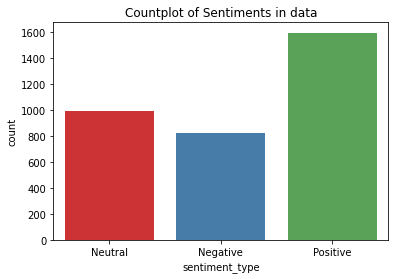

<Figure size 800x800 with 0 Axes>

In [23]:
# Displaying the sentiments on a countplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'sentiment_type',data = Tweets_df,palette='Set1' )
plt.title('Countplot of Sentiments in data')
plt.figure(figsize=(8,8),dpi=100)
plt.show()


In [24]:
# Frequency table
Tweets_df.sentiment_type.value_counts()

Positive    1597
Neutral      994
Negative     825
Name: sentiment_type, dtype: int64

### **Text Pre-Processing using key words**

In [25]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [26]:
# # We are keeping cleaned tweets in a new column called 'tidy_tweets'
Tweets_df['tidy_tweets'] = np.vectorize(remove_pattern)(Tweets_df['tweet'],"@[\w]*")
Tweets_df.head(10)

,tweet,scores,compound,sentiment_type,tidy_tweets
0,@KenyaPower_Care @AndrewNjega #Postconstructio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"#Postconstructioncleaning in Eastleigh, Utaw..."
3,@KenyaPower_Care @KenyaPower you people are fu...,"{'neg': 0.126, 'neu': 0.831, 'pos': 0.042, 'co...",-0.6525,Negative,you people are fucking joking!! Why is it th...
4,@KenyaPower_Care today our token was stolen h...,"{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'comp...",-0.4939,Negative,today our token was stolen how can we get an...
7,@KenyaPower_Care No lights at Mwihoko 160 sinc...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.2960,Negative,No lights at Mwihoko 160 since wee hours of t...
8,@Ma3Route @KenyaPower_Care @KenyaPower They ha...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"They have asked for details, let's wait for..."
12,@KenyaPower_Care When I press 095 it's saying ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,When I press 095 it's saying null https://t...
15,@KenyaPower_Care Day No. 5. Still no substa...,"{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp...",-0.5267,Negative,Day No. 5. Still no substantive action. ...
16,@KenyaPower_Care Judge for yourself because th...,"{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",-0.4019,Negative,Judge for yourself because thats what those i...
17,@KenyaPower_Care The last 1 month we have been...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.4389,Positive,The last 1 month we have been experiencing re...
18,@KenyaPower_Care Hello please check a/c 201366...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.3182,Positive,Hello please check a/c 20136618 cause the bil...


In [27]:
# # Removing links (http | https)

cleaned_tweets = []

for index, row in Tweets_df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

Tweets_df['tidy_tweets'] = cleaned_tweets
Tweets_df.head(10)

,tweet,scores,compound,sentiment_type,tidy_tweets
0,@KenyaPower_Care @AndrewNjega #Postconstructio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"#Postconstructioncleaning in Eastleigh, Utawal..."
3,@KenyaPower_Care @KenyaPower you people are fu...,"{'neg': 0.126, 'neu': 0.831, 'pos': 0.042, 'co...",-0.6525,Negative,you people are fucking joking!! Why is it that...
4,@KenyaPower_Care today our token was stolen h...,"{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'comp...",-0.4939,Negative,today our token was stolen how can we get anot...
7,@KenyaPower_Care No lights at Mwihoko 160 sinc...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.2960,Negative,No lights at Mwihoko 160 since wee hours of th...
8,@Ma3Route @KenyaPower_Care @KenyaPower They ha...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"They have asked for details, let's wait for ac..."
12,@KenyaPower_Care When I press 095 it's saying ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,When I press 095 it's saying null
15,@KenyaPower_Care Day No. 5. Still no substa...,"{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp...",-0.5267,Negative,Day No. 5. Still no substantive action. We hav...
16,@KenyaPower_Care Judge for yourself because th...,"{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",-0.4019,Negative,Judge for yourself because thats what those in...
17,@KenyaPower_Care The last 1 month we have been...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.4389,Positive,The last 1 month we have been experiencing reg...
18,@KenyaPower_Care Hello please check a/c 201366...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.3182,Positive,Hello please check a/c 20136618 cause the bill...


In [28]:
# # Removing tweets with empty text
Tweets_df = Tweets_df[Tweets_df['tidy_tweets']!='']
Tweets_df.head(5)

,tweet,scores,compound,sentiment_type,tidy_tweets
0,@KenyaPower_Care @AndrewNjega #Postconstructio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"#Postconstructioncleaning in Eastleigh, Utawal..."
3,@KenyaPower_Care @KenyaPower you people are fu...,"{'neg': 0.126, 'neu': 0.831, 'pos': 0.042, 'co...",-0.6525,Negative,you people are fucking joking!! Why is it that...
4,@KenyaPower_Care today our token was stolen h...,"{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'comp...",-0.4939,Negative,today our token was stolen how can we get anot...
7,@KenyaPower_Care No lights at Mwihoko 160 sinc...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.2960,Negative,No lights at Mwihoko 160 since wee hours of th...
8,@Ma3Route @KenyaPower_Care @KenyaPower They ha...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"They have asked for details, let's wait for ac..."


In [29]:
# # Drop duplicate rows

Tweets_df.drop_duplicates(subset=['tidy_tweets'], keep=False)
Tweets_df.head(1)

,tweet,scores,compound,sentiment_type,tidy_tweets
0,@KenyaPower_Care @AndrewNjega #Postconstructio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"#Postconstructioncleaning in Eastleigh, Utawal..."


In [30]:
# Resetting index
# It seems that our index needs to be reset, since after removal of some rows, some index values are missing,
#  which may cause problem in future operations.

Tweets_df = Tweets_df.reset_index(drop=True)
Tweets_df.head(1)

,tweet,scores,compound,sentiment_type,tidy_tweets
0,@KenyaPower_Care @AndrewNjega #Postconstructio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"#Postconstructioncleaning in Eastleigh, Utawal..."


Removing Punctuations, Numbers and Special characters
This step should not be followed if we also want to do sentiment analysis on key phrases as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on key words.

In [31]:
Tweets_df['absolute_tidy_tweets'] = Tweets_df['tidy_tweets'].str.replace("[^a-zA-Z#@ ]", "")

In [32]:
Tweets_df.head()

,tweet,scores,compound,sentiment_type,tidy_tweets,absolute_tidy_tweets
0,@KenyaPower_Care @AndrewNjega #Postconstructio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"#Postconstructioncleaning in Eastleigh, Utawal...",#Postconstructioncleaning in Eastleigh Utawala...
1,@KenyaPower_Care @KenyaPower you people are fu...,"{'neg': 0.126, 'neu': 0.831, 'pos': 0.042, 'co...",-0.6525,Negative,you people are fucking joking!! Why is it that...,you people are fucking joking Why is it that t...
2,@KenyaPower_Care today our token was stolen h...,"{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'comp...",-0.4939,Negative,today our token was stolen how can we get anot...,today our token was stolen how can we get anot...
3,@KenyaPower_Care No lights at Mwihoko 160 sinc...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.2960,Negative,No lights at Mwihoko 160 since wee hours of th...,No lights at Mwihoko since wee hours of the m...
4,@Ma3Route @KenyaPower_Care @KenyaPower They ha...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"They have asked for details, let's wait for ac...",They have asked for details lets wait for action


Removing Stop words
With the same reason we mentioned above, we won't perform this on 'tidy_tweets' column, because it needs to be used for key_phrases sentiment analysis.

In [33]:
stopwords_set = set(stopwords)
cleaned_tweets = []

for index, row in Tweets_df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
Tweets_df['absolute_tidy_tweets'] = cleaned_tweets
Tweets_df.head(10)

,tweet,scores,compound,sentiment_type,tidy_tweets,absolute_tidy_tweets
0,@KenyaPower_Care @AndrewNjega #Postconstructio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"#Postconstructioncleaning in Eastleigh, Utawal...",Eastleigh Utawala Rongai Ruiru available Call us
1,@KenyaPower_Care @KenyaPower you people are fu...,"{'neg': 0.126, 'neu': 0.831, 'pos': 0.042, 'co...",-0.6525,Negative,you people are fucking joking!! Why is it that...,people fucking joking Why happens weekends Are...
2,@KenyaPower_Care today our token was stolen h...,"{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'comp...",-0.4939,Negative,today our token was stolen how can we get anot...,today token stolen get another one
3,@KenyaPower_Care No lights at Mwihoko 160 sinc...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.2960,Negative,No lights at Mwihoko 160 since wee hours of th...,No lights Mwihoko since wee hours morning I re...
4,@Ma3Route @KenyaPower_Care @KenyaPower They ha...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"They have asked for details, let's wait for ac...",They asked details lets wait action
5,@KenyaPower_Care When I press 095 it's saying ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,When I press 095 it's saying null,When I press saying null
6,@KenyaPower_Care Day No. 5. Still no substa...,"{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp...",-0.5267,Negative,Day No. 5. Still no substantive action. We hav...,Day No Still substantive action We simply esca...
7,@KenyaPower_Care Judge for yourself because th...,"{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",-0.4019,Negative,Judge for yourself because thats what those in...,Judge thats interruptions buffles got reading
8,@KenyaPower_Care The last 1 month we have been...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.4389,Positive,The last 1 month we have been experiencing reg...,The last month experiencing regular power outa...
9,@KenyaPower_Care Hello please check a/c 201366...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.3182,Positive,Hello please check a/c 20136618 cause the bill...,Hello please check ac cause bill gone hii right


Tokenize *'absolute_tidy_tweets'*

In [34]:
tokenized_tweet = Tweets_df['absolute_tidy_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Eastleigh, Utawala, Rongai, Ruiru, available,...
1    [people, fucking, joking, Why, happens, weeken...
2            [today, token, stolen, get, another, one]
3    [No, lights, Mwihoko, since, wee, hours, morni...
4           [They, asked, details, lets, wait, action]
Name: absolute_tidy_tweets, dtype: object

 Converting words to Lemma

In [35]:
word_lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0    [Eastleigh, Utawala, Rongai, Ruiru, available,...
1    [people, fucking, joking, Why, happens, weeken...
2            [today, token, stolen, get, another, one]
3    [No, light, Mwihoko, since, wee, hour, morning...
4             [They, asked, detail, let, wait, action]
Name: absolute_tidy_tweets, dtype: object

Joining all tokens into sentences

In [36]:
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

Tweets_df['absolute_tidy_tweets'] = tokenized_tweet
Tweets_df.head(10)

,tweet,scores,compound,sentiment_type,tidy_tweets,absolute_tidy_tweets
0,@KenyaPower_Care @AndrewNjega #Postconstructio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"#Postconstructioncleaning in Eastleigh, Utawal...",Eastleigh Utawala Rongai Ruiru available Call u
1,@KenyaPower_Care @KenyaPower you people are fu...,"{'neg': 0.126, 'neu': 0.831, 'pos': 0.042, 'co...",-0.6525,Negative,you people are fucking joking!! Why is it that...,people fucking joking Why happens weekend Are ...
2,@KenyaPower_Care today our token was stolen h...,"{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'comp...",-0.4939,Negative,today our token was stolen how can we get anot...,today token stolen get another one
3,@KenyaPower_Care No lights at Mwihoko 160 sinc...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.2960,Negative,No lights at Mwihoko 160 since wee hours of th...,No light Mwihoko since wee hour morning I repo...
4,@Ma3Route @KenyaPower_Care @KenyaPower They ha...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"They have asked for details, let's wait for ac...",They asked detail let wait action
5,@KenyaPower_Care When I press 095 it's saying ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,When I press 095 it's saying null,When I press saying null
6,@KenyaPower_Care Day No. 5. Still no substa...,"{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp...",-0.5267,Negative,Day No. 5. Still no substantive action. We hav...,Day No Still substantive action We simply esca...
7,@KenyaPower_Care Judge for yourself because th...,"{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",-0.4019,Negative,Judge for yourself because thats what those in...,Judge thats interruption buffles got reading
8,@KenyaPower_Care The last 1 month we have been...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.4389,Positive,The last 1 month we have been experiencing reg...,The last month experiencing regular power outa...
9,@KenyaPower_Care Hello please check a/c 201366...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.3182,Positive,Hello please check a/c 20136618 cause the bill...,Hello please check ac cause bill gone hii right


### **Key Phrases** 

 Pre-processing 'Key Phrases'

In [37]:
class PhraseExtractHelper(object):
    def __init__(self):
        self.lemmatizer = nltk.WordNetLemmatizer()
        self.stemmer = nltk.stem.porter.PorterStemmer()
    
    def leaves(self, tree):
        """Finds NP (nounphrase) leaf nodes of a chunk tree."""
        for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
            yield subtree.leaves()

    def normalise(self, word):
        """Normalises words to lowercase and stems and lemmatizes it."""
        word = word.lower()
        # word = self.stemmer.stem_word(word) # We will loose the exact meaning of the word 
        word = self.lemmatizer.lemmatize(word)
        return word

    def acceptable_word(self, word):
        """Checks conditions for acceptable word: length, stopword. We can increase the length if we want to consider large phrase"""
        accepted = bool(3 <= len(word) <= 40
            and word.lower() not in stopwords
            and 'https' not in word.lower()
            and 'http' not in word.lower()
            and '#' not in word.lower()
            )
        return accepted

    def get_terms(self, tree):
        for leaf in self.leaves(tree):
            term = [ self.normalise(w) for w,t in leaf if self.acceptable_word(w) ]
            yield term

 Grammatical rule to identify phrases

In [38]:
sentence_re = r'(?:(?:[A-Z])(?:.[A-Z])+.?)|(?:\w+(?:-\w+)*)|(?:\$?\d+(?:.\d+)?%?)|(?:...|)(?:[][.,;"\'?():-_`])'
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

 New feature called 'key_phrases', will contain phrases for corresponding tweet

In [39]:

key_phrases = []
phrase_extract_helper = PhraseExtractHelper()

for index, row in Tweets_df.iterrows(): 
    toks = nltk.regexp_tokenize(row.tidy_tweets, sentence_re)
    postoks = nltk.tag.pos_tag(toks)
    tree = chunker.parse(postoks)

    terms = phrase_extract_helper.get_terms(tree)
    tweet_phrases = []

    for term in terms:
        if len(term):
            tweet_phrases.append(' '.join(term))
    
    key_phrases.append(tweet_phrases)
    
key_phrases[:10]

[['eastleigh', 'utawala', 'rongai', 'ruiru'],
 ['people',
  '!! w',
  'weekend',
  '!! a',
  'hatujui ????',
  'power',
  'uthiru  87.',
  'hour',
  'power',
  'day',
  'week people',
  '????'],
 ['today', 'token'],
 ['light', 'mwihoko', 'wee hour', 'morning'],
 ['detail', 'wait', 'action'],
 [" it'", 'null'],
 ['day',
  'substantive action',
  'issue',
  'regional manager',
  'today',
  'electrocution',
  'wait',
  'see'],
 ['judge', 'thats', 'interruption'],
 ['month',
  'regular power outage',
  'long hour',
  'permanent solution',
  'meter number'],
 ['hello please', 'cause', 'bill', 'right ....']]

Adding the key phrases extracted to our Dataframe

In [40]:
Tweets_df['key_phrases'] = key_phrases
Tweets_df.head(10)

,tweet,scores,compound,sentiment_type,tidy_tweets,absolute_tidy_tweets,key_phrases
0,@KenyaPower_Care @AndrewNjega #Postconstructio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"#Postconstructioncleaning in Eastleigh, Utawal...",Eastleigh Utawala Rongai Ruiru available Call u,"[eastleigh, utawala, rongai, ruiru]"
1,@KenyaPower_Care @KenyaPower you people are fu...,"{'neg': 0.126, 'neu': 0.831, 'pos': 0.042, 'co...",-0.6525,Negative,you people are fucking joking!! Why is it that...,people fucking joking Why happens weekend Are ...,"[people, !! w, weekend, !! a, hatujui ????, po..."
2,@KenyaPower_Care today our token was stolen h...,"{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'comp...",-0.4939,Negative,today our token was stolen how can we get anot...,today token stolen get another one,"[today, token]"
3,@KenyaPower_Care No lights at Mwihoko 160 sinc...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.2960,Negative,No lights at Mwihoko 160 since wee hours of th...,No light Mwihoko since wee hour morning I repo...,"[light, mwihoko, wee hour, morning]"
4,@Ma3Route @KenyaPower_Care @KenyaPower They ha...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"They have asked for details, let's wait for ac...",They asked detail let wait action,"[detail, wait, action]"
5,@KenyaPower_Care When I press 095 it's saying ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,When I press 095 it's saying null,When I press saying null,"[ it', null]"
6,@KenyaPower_Care Day No. 5. Still no substa...,"{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp...",-0.5267,Negative,Day No. 5. Still no substantive action. We hav...,Day No Still substantive action We simply esca...,"[day, substantive action, issue, regional mana..."
7,@KenyaPower_Care Judge for yourself because th...,"{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",-0.4019,Negative,Judge for yourself because thats what those in...,Judge thats interruption buffles got reading,"[judge, thats, interruption]"
8,@KenyaPower_Care The last 1 month we have been...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.4389,Positive,The last 1 month we have been experiencing reg...,The last month experiencing regular power outa...,"[month, regular power outage, long hour, perma..."
9,@KenyaPower_Care Hello please check a/c 201366...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.3182,Positive,Hello please check a/c 20136618 cause the bill...,Hello please check ac cause bill gone hii right,"[hello please, cause, bill, right ....]"


Story Generation and Visualization

In [41]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

Most common words in positive tweets

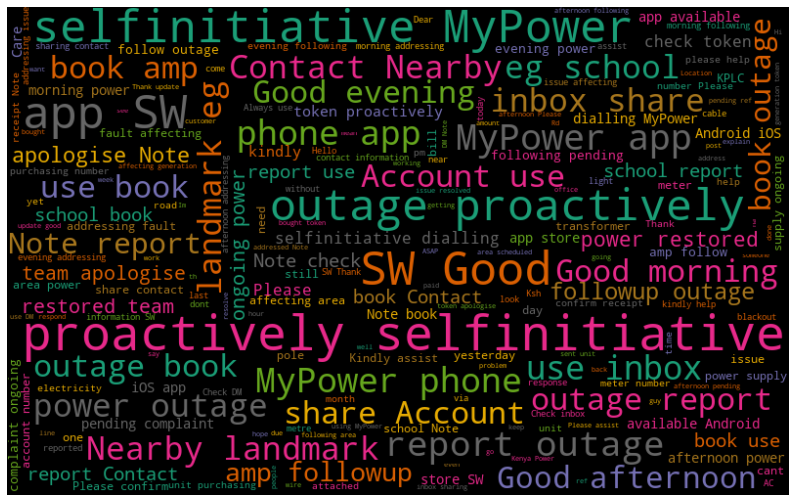

In [42]:
all_words = ' '.join([text for text in Tweets_df['absolute_tidy_tweets'][Tweets_df.sentiment_type == 'Positive']])
generate_wordcloud(all_words)

 Most common words in negative tweets









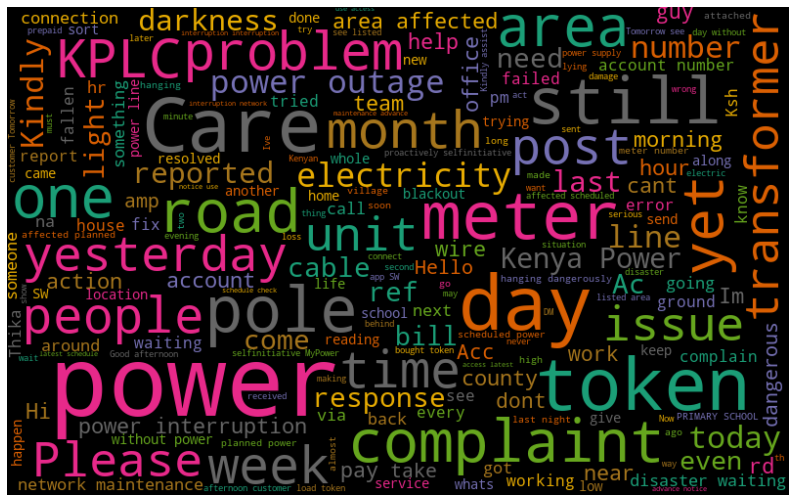

In [43]:
all_words = ' '.join([text for text in Tweets_df['absolute_tidy_tweets'][Tweets_df.sentiment_type == 'Negative']])
generate_wordcloud(all_words)

 Most common words in neutral tweets



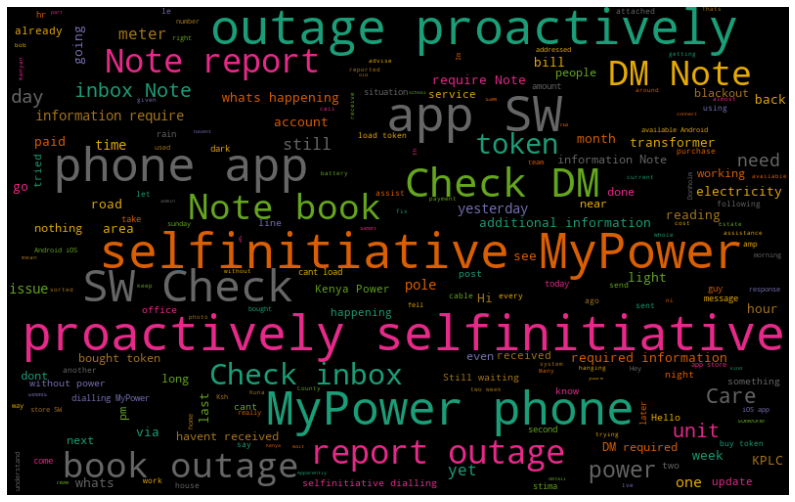

In [44]:
all_words = ' '.join([text for text in Tweets_df['absolute_tidy_tweets'][Tweets_df.sentiment_type == 'Neutral']])
generate_wordcloud(all_words)

### **Classifier Modelling**

In [45]:
Tweets_df['sentiment_type'] = Tweets_df.sentiment_type.map({'Positive':1,'Negative':2,'Neutral':0})

In [46]:
# Df copy incase
tweeter = Tweets_df.copy()
tweeter.head(1)

,tweet,scores,compound,sentiment_type,tidy_tweets,absolute_tidy_tweets,key_phrases
0,@KenyaPower_Care @AndrewNjega #Postconstructio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0,"#Postconstructioncleaning in Eastleigh, Utawal...",Eastleigh Utawala Rongai Ruiru available Call u,"[eastleigh, utawala, rongai, ruiru]"


In [47]:
Tweets_df.head(50)

,tweet,scores,compound,sentiment_type,tidy_tweets,absolute_tidy_tweets,key_phrases
0,@KenyaPower_Care @AndrewNjega #Postconstructio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,"#Postconstructioncleaning in Eastleigh, Utawal...",Eastleigh Utawala Rongai Ruiru available Call u,"[eastleigh, utawala, rongai, ruiru]"
1,@KenyaPower_Care @KenyaPower you people are fu...,"{'neg': 0.126, 'neu': 0.831, 'pos': 0.042, 'co...",-0.6525,2,you people are fucking joking!! Why is it that...,people fucking joking Why happens weekend Are ...,"[people, !! w, weekend, !! a, hatujui ????, po..."
2,@KenyaPower_Care today our token was stolen h...,"{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'comp...",-0.4939,2,today our token was stolen how can we get anot...,today token stolen get another one,"[today, token]"
3,@KenyaPower_Care No lights at Mwihoko 160 sinc...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.2960,2,No lights at Mwihoko 160 since wee hours of th...,No light Mwihoko since wee hour morning I repo...,"[light, mwihoko, wee hour, morning]"
4,@Ma3Route @KenyaPower_Care @KenyaPower They ha...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,"They have asked for details, let's wait for ac...",They asked detail let wait action,"[detail, wait, action]"
5,@KenyaPower_Care When I press 095 it's saying ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,When I press 095 it's saying null,When I press saying null,"[ it', null]"
6,@KenyaPower_Care Day No. 5. Still no substa...,"{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp...",-0.5267,2,Day No. 5. Still no substantive action. We hav...,Day No Still substantive action We simply esca...,"[day, substantive action, issue, regional mana..."
7,@KenyaPower_Care Judge for yourself because th...,"{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",-0.4019,2,Judge for yourself because thats what those in...,Judge thats interruption buffles got reading,"[judge, thats, interruption]"
8,@KenyaPower_Care The last 1 month we have been...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.4389,1,The last 1 month we have been experiencing reg...,The last month experiencing regular power outa...,"[month, regular power outage, long hour, perma..."
9,@KenyaPower_Care Hello please check a/c 201366...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.3182,1,Hello please check a/c 20136618 cause the bill...,Hello please check ac cause bill gone hii right,"[hello please, cause, bill, right ....]"


#### Some more cleaning just to be sure before deploying our model

In [48]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [49]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [50]:
X = []
sentences = list(Tweets_df['absolute_tidy_tweets'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [51]:
y = Tweets_df['sentiment_type'].values

In [52]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### TEST 1

In [56]:
# # split into X and Y
y = tweeter['sentiment_type']
X = tweeter['absolute_tidy_tweets']

print(X.shape)
print(y.shape)

# # convert to numpy arrays
X = np.array(X)

(3416,)
(3416,)


In [57]:
# # show Y
y.head()

0    0
1    2
2    2
3    2
4    0
Name: sentiment_type, dtype: int64

In [58]:

# from sklearn.preprocessing import LabelEncoder
# from keras.utils import np_utils
# # work with labels
# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(y)
# encoded_y = encoder.transform(y)
# # convert integers to dummy variables (i.e. one hot encoded)
# y = np_utils.to_categorical(encoded_y)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Importing libraries for our neural network

In [60]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [61]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [62]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/glove.6B.50d.txt', encoding="utf8")  

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [65]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='relu'))

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.1)

Epoch 1/20
20/20 [==============================] - 1s 15ms/step - loss: 4.5750 - acc: 0.4336 - val_loss: -0.1932 - val_acc: 0.6079
Epoch 2/20
20/20 [==============================] - 0s 5ms/step - loss: -0.2927 - acc: 0.5982 - val_loss: -1.3322 - val_acc: 0.6007
Epoch 3/20
20/20 [==============================] - 0s 6ms/step - loss: -0.9652 - acc: 0.5744 - val_loss: -1.5692 - val_acc: 0.6223
Epoch 4/20
20/20 [==============================] - 0s 7ms/step - loss: -1.0936 - acc: 0.6103 - val_loss: -1.2676 - val_acc: 0.6295
Epoch 5/20
20/20 [==============================] - 0s 7ms/step - loss: -0.8027 - acc: 0.6134 - val_loss: -1.6108 - val_acc: 0.6115
Epoch 6/20
20/20 [==============================] - 0s 6ms/step - loss: -1.3280 - acc: 0.6090 - val_loss: -1.6754 - val_acc: 0.6115
Epoch 7/20
20/20 [==============================] - 0s 6ms/step - loss: -1.1317 - acc: 0.6001 - val_loss: -1.6016 - val_acc: 0.6115
Epoch 8/20
20/20 [==============================] - 0s 6ms/step - loss: -1.3

In [ ]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# print(model.summary())

In [ ]:
# import keras
# from keras.callbacks import EarlyStopping

# # early stopping callback
# # This callback will stop the training when there is no improvement in  
# # the validation loss for 10 consecutive epochs.  
# es = keras.callbacks.EarlyStopping(monitor='val_loss', 
#                                    mode='min',
#                                    patience=10, 
#                                    restore_best_weights=True) # important - otherwise you just return the last weigths...



# history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)


In [ ]:
# score = model.evaluate(X_test, y_test, verbose=1)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

22/22 [==============================] - 0s 2ms/step - loss: -1.5922 - acc: 0.6058


In [ ]:
# print("Test Loss Score:", score[0])
# print("Test Accuracy:", score[1])

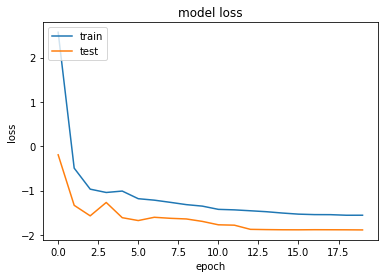

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train','test'], loc='upper left')
# plt.show()

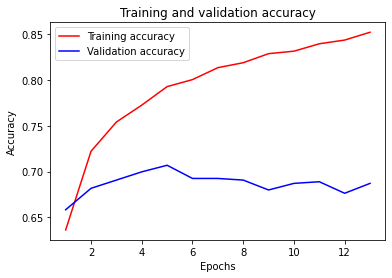

In [ ]:
# history_dict = history.history

# # learning curve
# # accuracy
# acc = history_dict['acc']
# val_acc = history_dict['val_acc']

# # loss
# loss = history_dict['loss']
# val_loss = history_dict['val_loss']

# # range of X (no. of epochs)
# epochs = range(1, len(acc) + 1)

# # plot
# # "r" is for "solid red line"
# plt.plot(epochs, acc, 'r', label='Training accuracy')
# # b is for "solid blue line"
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()

### LSTM

In [ ]:
from keras.layers import LSTM
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 50)           215150    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               91648     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 306,927
Trainable params: 91,777
Non-trainable params: 215,150
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
18/18 [==============================] - 8s 343ms/step - loss: nan - acc: 0.2937 - val_loss: nan - val_acc: 0.2554
Epoch 2/20
18/18 [==============================] - 6s 309ms/step - loss: nan - acc: 0.2787 - val_loss: nan - val_acc: 0.2554
Epoch 3/20
18/18 [==============================] - 6s 308ms/step - loss: nan - acc: 0.2825 - val_loss: nan - val_acc: 0.2554
Epoch 4/20
18/18 [==============================] - 6s 308ms/step - loss: nan - acc: 0.2809 - val_loss: nan - val_acc: 0.2554
Epoch 5/20
18/18 [==============================] - 6s 311ms/step - loss: nan - acc: 0.2930 - val_loss: nan - val_acc: 0.2554
Epoch 6/20
18/18 [==============================] - 6s 313ms/step - loss: nan - acc: 0.2949 - val_loss: nan - val_acc: 0.2554
Epoch 7/20
18/18 [==============================] - 6s 313ms/step - loss: nan - acc: 0.2893 - val_loss: nan - val_acc: 0.2554
Epoch 8/20
18/18 [==============================] - 6s 316ms/step - loss: nan - acc: 0.2798 - val_loss: nan - val_acc:

In [ ]:
# score = model.evaluate(X_test, y_test, verbose=1)

22/22 [==============================] - 1s 32ms/step - loss: nan - acc: 0.3165


In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train','test'], loc='upper left')
# plt.show()

## **Conclusion and Recommendations**



*   **Kenya Power needs to have a better approach of dealing with complaints    inorder to ensure better service delivery. This was observed by the influx of Negative comments and sentiments asscociated with tweets analysed.** 
* **Natural language processing and Sentiment Analysis involving African languages (eg.Swahili) needs to improve inorder to enable better accuracy and sentiment scoring of information involving non-english text. This was particularly a big problem for us and we had to filter only tweets in English , hence probably losing important information.**

